## set up

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from scipy.stats import norm
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from models.VAE import VariationalAutoencoder
from utils.loaders import load_model, ImageLabelLoader

Using TensorFlow backend.


Found 5216 images belonging to 2 classes.


W1208 11:12:11.185615 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:12:11.195290 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:12:11.204870 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:12:11.213967 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:12:11.222126 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


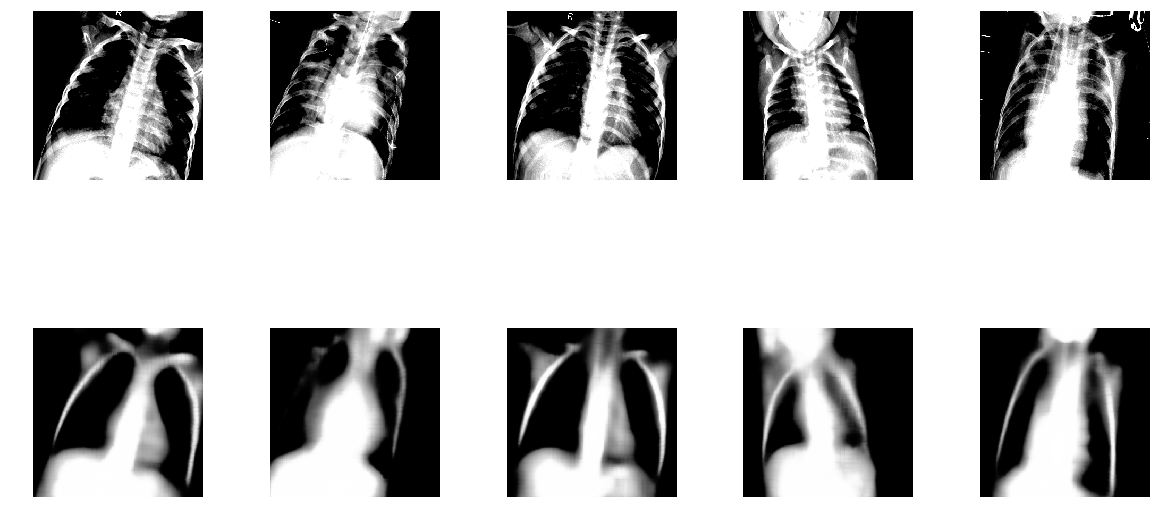

In [6]:
# run params
section = 'vae'
run_id = '0001'
data_name = 'x-ray_old'
RUN_FOLDER = 'run/{}/'.format(section)
RUN_FOLDER += '_'.join([run_id, data_name])
#train_dir_norm = "data/X-ray_dataset_old/chest_xray/train/NORMAL"
#train_dir_pneu = "data/X-ray_dataset_old/chest_xray/train/PNEUMONIA"
#test_dir_norm = "data/X-ray_dataset_old/chest_xray/test/NORMAL"
#test_dir_pneu = "data/X-ray_dataset_old/chest_xray/test/PNEUMONIA"
#test_dir = "data/X-ray_dataset_old/chest_xray/test/PNEUMONIA"
#filenames_train_norm = os.listdir(train_dir_norm)
#filenames_train_pneu = np.array(glob(os.path.join(train_dir_pneu, '*.jpeg')))
#filenames_test_norm = os.listdir(test_dir_norm)
#filenames_test_pneu = np.array(glob(os.path.join(test_dir_pneu, '*.jpeg')))
n_to_show = 5
#example_idx_norm = np.random.choice(range(len(filenames_train_norm)), 10)
#example_idx_pneu = np.random.choice(range(len(filenames_train_pneu)), 5)
#example_images = filenames_train_norm[example_idx_norm]
train_dir = "data/X-ray_dataset_old/chest_xray/train"
test_dir = "data/X-ray_dataset_old/chest_xray/test"
INPUT_DIM = (320,320,3)
BATCH_SIZE = 32
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)
train = data_gen.flow_from_directory(train_dir, 
                                            batch_size=BATCH_SIZE, 
                                            shuffle=True, 
                                            class_mode='input',
                                            subset = "training",
                                            target_size=INPUT_DIM[:2])
example_batch = next(train)
example_images = example_batch[0]
vae = load_model(VariationalAutoencoder, RUN_FOLDER)
z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    #sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')




Found 624 images belonging to 2 classes.


W1208 11:13:45.058650 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:13:45.067433 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:13:45.076438 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:13:45.086765 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1208 11:13:45.095140 139723931645760 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


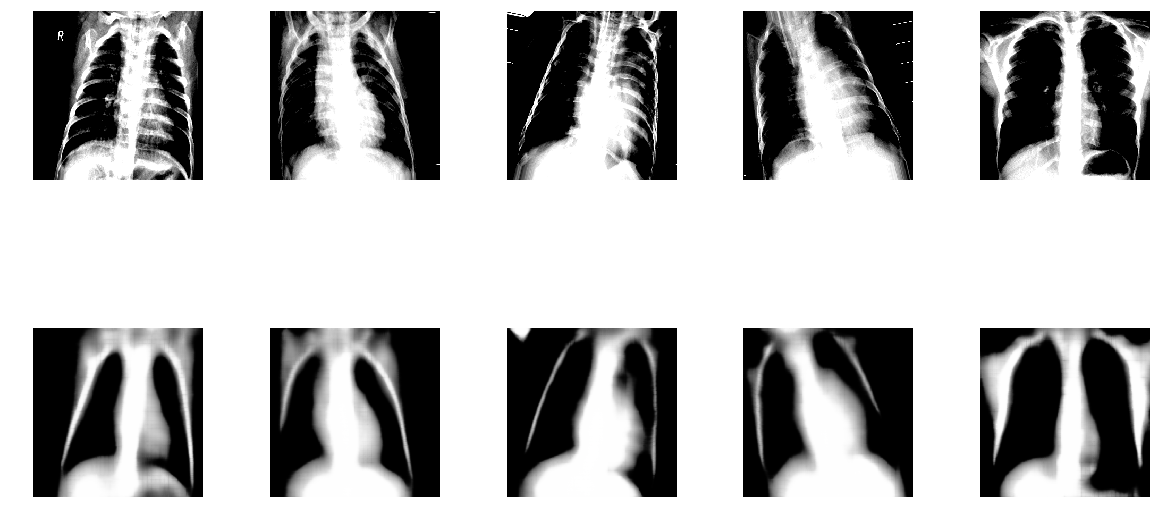

In [7]:
test = data_gen.flow_from_directory(test_dir, 
                                            batch_size=BATCH_SIZE, 
                                            shuffle=True, 
                                            class_mode='input',
                                            target_size=INPUT_DIM[:2])
example_batch = next(test)
example_images = example_batch[0]
vae = load_model(VariationalAutoencoder, RUN_FOLDER)
z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    #sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')
